# Prep Quiz 2: Machine learning!

### 1) GENERAL FRAMEWORK FOR IMAGE CLASSIFICATION

The general pipeline in classification consist on two set of data: 

-dataset for training:
    - **X_train** -> sample features
    - **y_train** -> sample labels

-dataset for test
    - **X_test** -> sample features

The **goal** is to estimate the labels for **X_test**.

What we need...

Importar librerias ... las de siempre...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# los estimadores...por ejemplo
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#...para metricas
from sklearn.metrics import *

cargamos los datos ...

In [2]:
d = pd.read_csv("../data/data_banknote_authentication.txt.gz")
X_train = d.values[:,:-1]
y_train = d.values[:,-1]

luego seleccionamos un método de clasificación y seguimos:
- Fit -> aprender el modelo con respecto a los datos etiquetados
- predict -> le pasamos nuestros datos de test
- score -> evaluamos el comportamiento de nuestro método

evaluando en test ..usando training and test

In [3]:
d = pd.read_csv("../data/data_banknote_authentication.txt.gz")
X_ = d.values[:,:-1]
y_ = d.values[:,-1]
n = int(len(X_)*0.9) #90%
X_train = X_[:n]
y_train = y_[:n]
X_test  = X_[n:]
y_test  = y_[n:]

print "shape X_train: " ,  X_train.shape, "shape y_train: " ,  y_train.shape
print "shape X_test: " ,  X_test.shape, "shape y_test: " ,  y_test.shape



shape X_train:  (1234, 4) shape y_train:  (1234,)
shape X_test:  (138, 4) shape y_test:  (138,)


In [4]:
estimator = GaussianNB()

estimator.fit(X_train, y_train)
predictions = estimator.predict(X_test)

score_1 = accuracy_score(predictions, y_test)
score_2 = np.mean(predictions==y_test)
print "score 1 %.2f"%score_1
print "score 2: %.2f"%score_2
estimator.score(X_test, y_test)

score 1 0.81
score 2: 0.81


0.81159420289855078

# Desafio: Fashion MNIST

## Explore the dataset
    
    1. How many classses ?
    2. How many images ?
    3. How the distribution of data is?

<img src="../imgs/fashion-mnist-sprite.png" style="width:300px;">
<img src="../imgs/embedding.gif" style="width:300px;">

- Download data from <a href="https://github.com/zalandoresearch/fashion-mnist"> HERE</a>).</small>
- Copy data in **../data/fashion/**
- **Dont** unzip

In [5]:
%run ../code/mnist_reader.py

X_train, y_train = load_mnist('../data/fashion', kind='train')
X_test, y_test = load_mnist('../data/fashion', kind='t10k')

- Which sizes have the training and test dataset ?

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


- only take 50 % of training and test

In [7]:
x2_train = X_train[:30000]
y2_train = y_train[:30000]

x2_test = X_test[:5000]
y2_test = y_test[:5000]

In [8]:
y2_train.shape

(30000,)

- what about class balance?

In [9]:
print "digito   número de imágenes"
for i in np.unique(y2_train):
    print "   ",int(i), "   ", np.sum(y2_train==i)

digito   número de imágenes
    0     2945
    1     3015
    2     2989
    3     3017
    4     2960
    5     3030
    6     3081
    7     3021
    8     2972
    9     2970


- what is the best classfier?

In [10]:
est = GaussianNB()
entreno = est.fit(x2_train,y2_train)
predictions = est.predict(x2_test)

In [11]:
print "%.3f"%accuracy_score(predictions, y2_test)

0.577


In [12]:
score_1 = accuracy_score(predictions, y2_test)
score_2 = np.mean(predictions==y2_test)
print "score 1 %.3f"%score_1
print "score 2: %.3f"%score_2

score 1 0.577
score 2: 0.577


In [13]:
est = DecisionTreeClassifier()
entreno = est.fit(x2_train,y2_train)
predictions = est.predict(x2_test)

In [14]:
print "%.3f"%accuracy_score(predictions, y2_test)

0.780


In [15]:
score_1 = accuracy_score(predictions, y2_test)
score_2 = np.mean(predictions==y2_test)
print "score 1 %.3f"%score_1
print "score 2: %.3f"%score_2

score 1 0.780
score 2: 0.780


In [16]:
est = RandomForestClassifier()
entreno = est.fit(x2_train,y2_train)
predictions = est.predict(x2_test)

In [17]:
print "%.3f"%accuracy_score(predictions, y2_test)

0.843


In [18]:
score_1 = accuracy_score(predictions, y2_test)
score_2 = np.mean(predictions==y2_test)
print "score 1 %.3f"%score_1
print "score 2: %.3f"%score_2

score 1 0.843
score 2: 0.843


In [19]:
n = int(len(X_train)*0.1)
x2_train = X_train[:n]
y2_train = y_train[:n]

x2_test = X_test[:n]
y2_test = y_test[:n]

In [ ]:
est = SVC()
entreno = est.fit(x2_train,y2_train)
predictions = est.predict(x2_test)

In [ ]:
print "%.3f"%accuracy_score(predictions, y2_test)

In [ ]:
score_1 = accuracy_score(predictions, y2_test)
score_2 = np.mean(predictions==y2_test)
print "score 1 %.3f"%score_1
print "score 2: %.3f"%score_2

- What about a linear kernel in RBF and with 'entropy' for measure the quality of trees 

In [20]:
est = SVC(kernel='linear')
entreno = est.fit(x2_train,y2_train)
predictions = est.predict(x2_test)


In [21]:
print "%.3f"%accuracy_score(predictions, y2_test)

0.795


In [22]:
score_1 = accuracy_score(predictions, y2_test)
score_2 = np.mean(predictions==y2_test)
print "score 1 %.3f"%score_1
print "score 2: %.3f"%score_2

score 1 0.795
score 2: 0.795


In [23]:
est = DecisionTreeClassifier(criterion='entropy')
entreno = est.fit(x2_train,y2_train)
predictions = est.predict(x2_test)


In [24]:
print "%.3f"%accuracy_score(predictions, y2_test)

0.745


Now, we go to the image representation.
- What about histograms?
- Visualize some examples

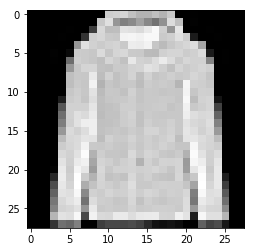

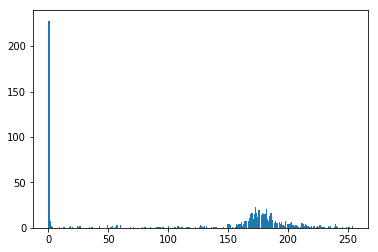

In [31]:
random_idx = np.random.randint(x2_train.shape[0])
hist = np.histogram(x2_train[random_idx], bins=255)[0];
plt.imshow(x2_train[random_idx].reshape(28,28),interpolation="nearest", cmap = plt.cm.Greys_r);
plt.figure();
plt.hist(x2_train[random_idx], bins=255);

<Container object of 254 artists>

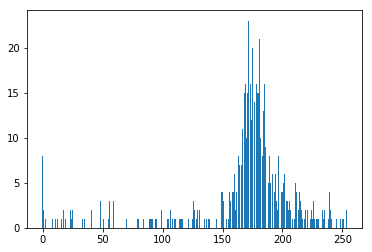

In [45]:
#quitamos el 0 del histograma
x = np.array(range(len(hist[1:255])))
plt.bar(x,hist[1:255], align='center')

- What about PCA representation ?
- Dont use cross-validation

- convolution is now useful?
- gradients are appropieate to describe these images?
- perform an experiment using some gradient kernel 

-visualize some examples

- compute again classifications and do a tunning of parameters

- what about several convolution as filters?
- what abot convolutions + PCA?
- what it is learning curve for different depth trees on random forest?
- what is confussion matrix


# References
 - https://github.com/zalandoresearch/fashion-mnist